In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [6]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank = pd.read_csv('bank.csv', sep=';')

In [142]:
bank_full.shape

(45211, 17)

In [7]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
bank_full.isnull().any().sum()

0

In [13]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
bank_full.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [138]:
num = bank_full.select_dtypes(exclude='object')
cat = bank_full.select_dtypes(include='object')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

enc = OrdinalEncoder()
le = LabelEncoder()
ohe = OneHotEncoder()
ohe.fit(cat)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [139]:
cat_enc = pd.DataFrame(enc.fit_transform(cat), columns=cat.columns)

In [140]:
df = pd.concat([num,cat_enc],1)
X = df.drop('y',1)
y = df.y

## Feature Selection
1) Var filter
2) SelectKBest
3) Heatmap
4) Feature Importances

In [70]:
num.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [92]:
#threshold = 100
#num = num[num.var()[num.var()>threshold].index]

No improvement seen in the accuracy score after the variance filter process (~0,88)

2- SelectKBest

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(score_func=f_classif)
select.fit(X, y)
select.transform(X)
features = select.get_support(indices=True)
X = X.iloc[:,features]

Still no improvement with this process either, lets get to the wrapped-based methods

3- Feature importances | RandomForest

In [93]:
df = pd.concat([num,cat_enc],1)
X = df.drop('y',1)
y = df.y

C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


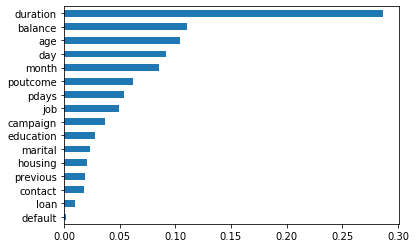

In [152]:
forest = RandomForestClassifier()
forest.fit(X,y)
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
X = X[feature_importances.nlargest(10).index]

Still no improvements in the accuracy, lets check the f1 score

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

clf = LogisticRegression(solver='lbfgs')

In [154]:
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.886755728567637

In [156]:
scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
scores.mean()

C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\olivi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

0.25236130283662334

In [136]:
score_.KEYS()

NameError: name 'score_' is not defined